# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
Trees are built by recursively splitting the data at decision nodes based on feature values that best reduce impurity or error, continuing until stopping criteria are met.
2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
Trees capture non-linear patterns by splitting data into regions based on thresholds. Unlike linear models, they don’t assume linearity and can naturally model complex interactions.
3. Why is the Gini a good loss function for categorical target variables? 
Gini measures class impurity. It favors splits that create pure nodes, improving classification, and is efficient to compute.
4. Why do trees tend to overfit, and how can this tendency be constrained? 
They overfit by growing too deep and capturing noise. Constrain with pruning, depth limits, minimum leaf size, or use ensembles like Random Forests.
5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
False. Trees work well with both categorical and continuous features due to their flexible, non-parametric nature.
6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Binary splits simplify computation, improve interpretability, and work well for continuous features.
7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
-   Overfitting: Deep tree, small leaves, high train but low test accuracy.
-   Underfitting: Shallow tree, low train accuracy, misses key patterns.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [9]:
import pandas as pd

file_path = './data/cars_hw.csv'
df = pd.read_csv(file_path)

num_rows, num_columns = df.shape
print(f"Number of observations: {num_rows}")
print(f"Number of variables: {num_columns}")

print("Available variables:")
print(df.columns.tolist())

print("First few rows of data:")
print(df.head())


Number of observations: 976
Number of variables: 12
Available variables:
['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
First few rows of data:
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manu

In [10]:
from sklearn.model_selection import train_test_split

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

X = df_encoded.drop(columns='Price')
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

min_leaf_range = range(1, 26)
r2_scores = []

for min_leaf in min_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((min_leaf, r2))

best_leaf, best_r2 = max(r2_scores, key=lambda x: x[1])
best_leaf, best_r2


(8, 0.8213135837522154)

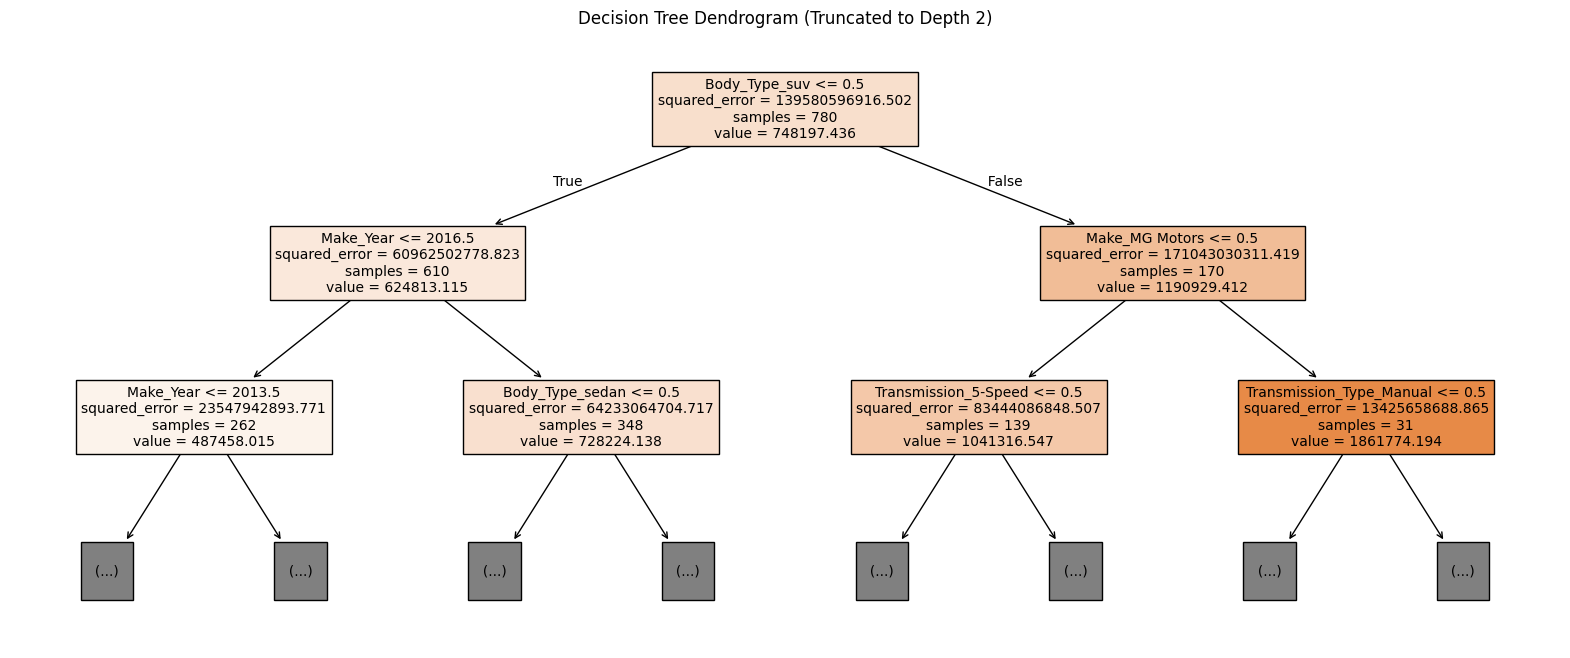

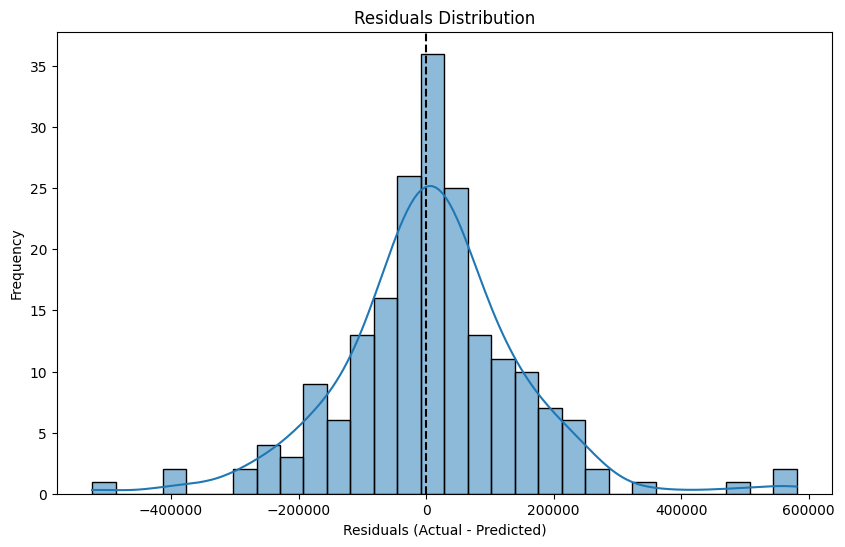

(0.8213135837522154,
 np.float64(143159.08892903704),
 count       196.000000
 mean       8443.816133
 std      143275.822134
 min     -523733.333333
 25%      -59361.111111
 50%        4807.692308
 75%       71712.121212
 max      581000.000000
 Name: Price, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

optimal_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
optimal_model.fit(X_train, y_train)

y_pred = optimal_model.predict(X_test)
r2_opt = r2_score(y_test, y_pred)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(20, 8))
plot_tree(optimal_model, feature_names=X.columns, filled=True, max_depth=2, fontsize=10)
plt.title("Decision Tree Dendrogram (Truncated to Depth 2)")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()

residual_stats = residuals.describe()

r2_opt, rmse_opt, residual_stats


- **Optimal `min_samples_leaf`**: `8`
    
- **$R^2$ on Test Set**: `0.8213`
    
- **RMSE**: `143,159`
    
- Mean ≈ `8,444` → Slight positive bias
    
- Symmetric distribution but with **slight positive skew**
    
- Residuals concentrated near zero 

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_lr, rmse_lr


(0.8163910583949119, np.float64(145117.59426198687))

Decision tree has better R^2 adn lower RMSE

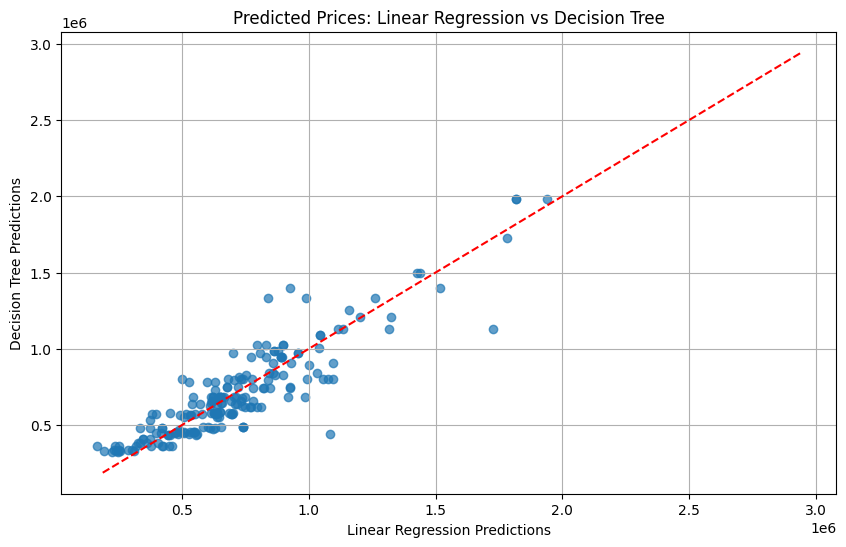

In [16]:
y_pred_tree = optimal_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, y_pred_tree, alpha=0.7)
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Predicted Prices: Linear Regression vs Decision Tree")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.show()


The linear regression predictions appear more tightly grouped and smoothed, whereas the decision tree adjusts more aggressively to local patterns. These differences are subtle but align with our earlier evaluation: both models perform similarly in terms of $R^2$ and RMSE, but the tree has slightly more expressive power.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

Let $\mathcal{X} \subseteq \mathbb{R}^d$ denote the feature space. A (regression) decision tree with $K$ leaves partitions $\mathcal{X}$ into $K$ disjoint sets:

$$
S_1,\;S_2,\;\dots,\;S_K,
$$

so that each feature vector $\mathbf{x} \in \mathcal{X}$ belongs to exactly one of these sets. For each set $S_k$, the tree assigns a constant prediction $m_k$. Hence, the tree’s prediction function can be written as:

$$
\hat{y}(\mathbf{x}) = \sum_{k=1}^K \mathbb{I}\{\mathbf{x} \in S_k\}\,m_k,
$$

where

$$
\mathbb{I}\{\mathbf{x} \in S_k\} 
=
\begin{cases}
1, & \text{if } \mathbf{x}\in S_k,\\
0, & \text{otherwise}.
\end{cases}
$$


Define $K$ dummy (indicator) variables:

$$
d_k(\mathbf{x}) = \mathbb{I}\{\mathbf{x} \in S_k\}, 
\quad k = 1,2,\dots,K.
$$

Observe that for each $\mathbf{x}$, exactly one of the $d_k(\mathbf{x})$ equals 1, and the rest are 0. Thus, the decision tree’s prediction becomes:

$$
\hat{y}(\mathbf{x}) = \sum_{k=1}^K m_k\,d_k(\mathbf{x}).
$$

This is precisely the form of a linear model in the variables $d_1(\mathbf{x}), d_2(\mathbf{x}), \dots, d_K(\mathbf{x})$. Concretely, if we treat $d_k(\mathbf{x})$ as our “feature inputs,” we have:

$$
\hat{y}(\mathbf{x}) 
= 
\beta_1\,d_1(\mathbf{x}) 
+ \beta_2\,d_2(\mathbf{x})
+ \dots 
+ \beta_K\,d_K(\mathbf{x}),
$$

where $\beta_k = m_k$. Hence, any decision tree is exactly equivalent to a linear regression model on $K$ dummy variables.


Consider a generic linear function in $d$-dimensional space:

$$
f(\mathbf{x})
=
\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d.
$$

Such a function is linear (and continuous) in the components of $\mathbf{x} = (x_1, \dots, x_d)$. By contrast, a decision tree with finitely many leaves is a piecewise-constant function.

- To exactly match the linear function $f(\mathbf{x})$ *everywhere* with a decision tree, one would need infinitely many splits to create infinitely many narrow regions whose constant predictions approximate the slope $\beta_1, \dots, \beta_d$.
- A finite, piecewise-constant function cannot match a continuously changing slope over an unbounded domain.
- In practice, we may approximate the linear function arbitrarily closely with a sufficiently deep tree, but cannot reproduce it *exactly* with a finite tree.

Hence, not every linear function can be represented exactly by a finite decision tree. On a finite training set, a sufficiently large tree can match the outputs of a linear model exactly (by assigning each point to its own leaf), but this does not replicate the function over the entire feature space.